<a href="https://colab.research.google.com/github/mdaamir6870/Time-Series-Analysis-with-Statistical-Model/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
# Step 1: Load the data
import pandas as pd

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'Sample - Superstore.csv'

for encoding in encodings_to_try:
    try:
        superstore_data = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

# Continue with your data analysis...


Failed to read with encoding: utf-8
Successfully read the file with encoding: latin1


In [4]:
superstore_data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


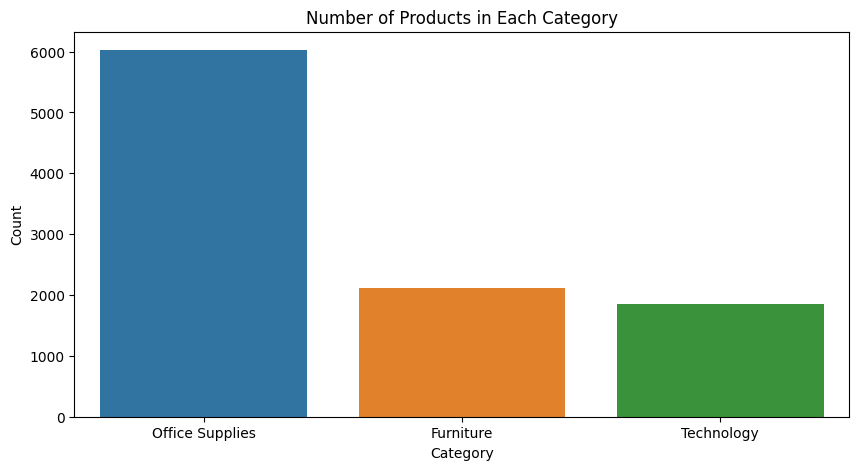

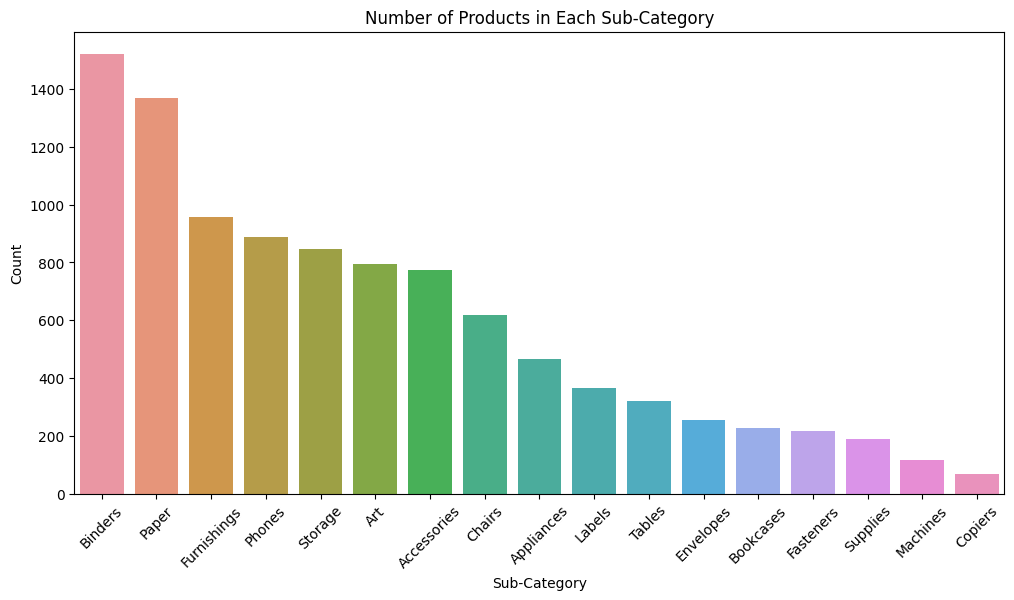

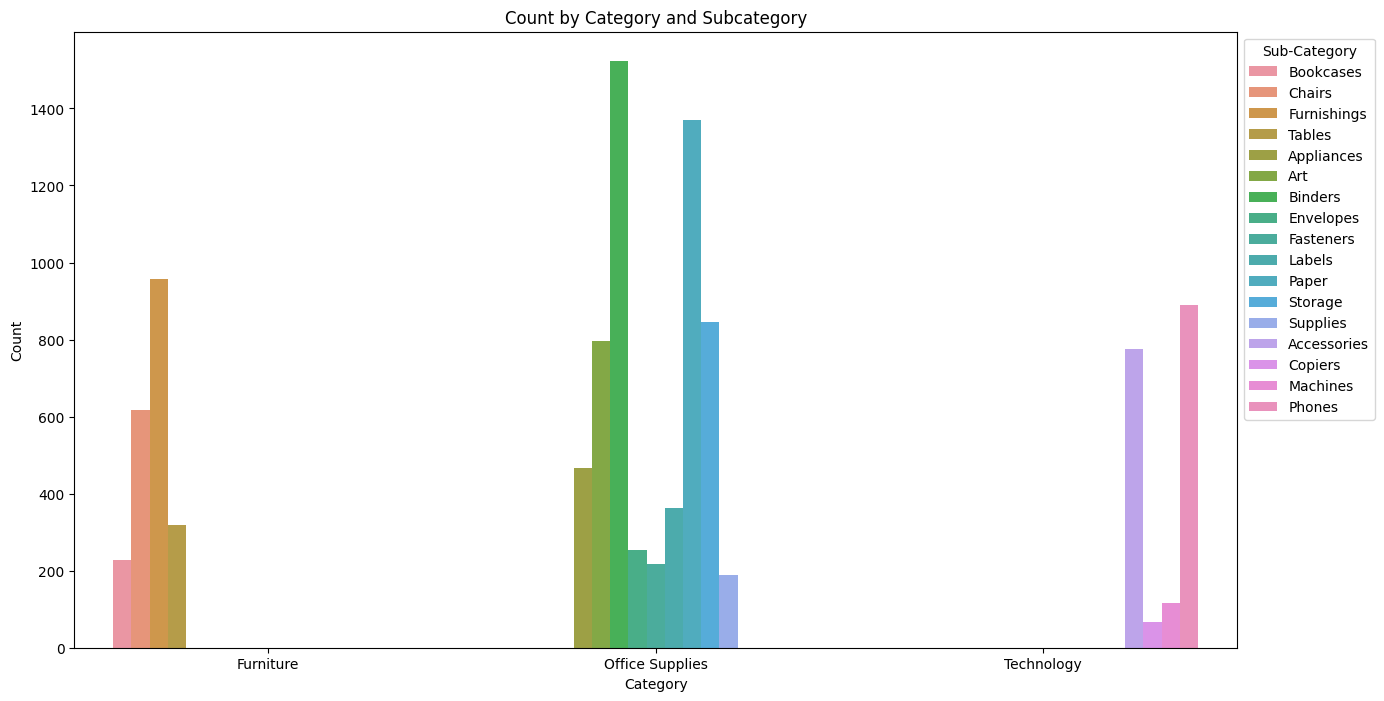

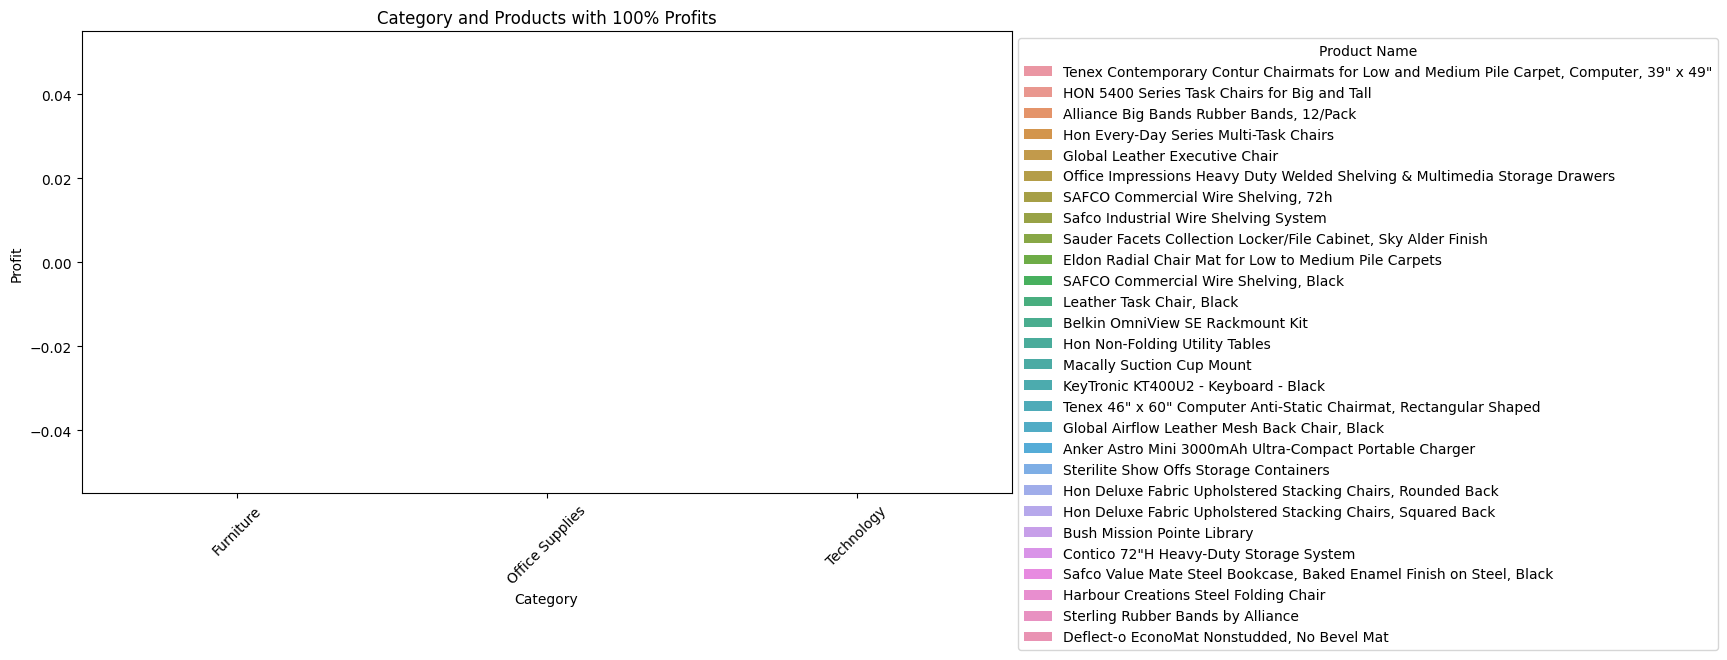

In [6]:
#Product Level Analysis
# * Number of products in each category
# * Number of products in each sub-category
# * Count by Category and Subcategory
# * Category and Products with 100% profits



# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns



# Number of products in each category
category_counts = superstore_data['Category'].value_counts()

# Number of products in each sub-category
subcategory_counts = superstore_data['Sub-Category'].value_counts()

# Count by Category and Subcategory
category_subcategory_counts = superstore_data.groupby(['Category', 'Sub-Category']).size().reset_index(name='Count')

# Category and Products with 100% profits
profitable_products = superstore_data[superstore_data['Profit'] == 0]

# Visualization

# Number of products in each category
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Products in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Number of products in each sub-category
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values)
plt.title('Number of Products in Each Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count by Category and Subcategory
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='Count', hue='Sub-Category', data=category_subcategory_counts)
plt.title('Count by Category and Subcategory')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1))
plt.show()

# Category and Products with 100% profits
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', hue='Product Name', data=profitable_products)
plt.title('Category and Products with 100% Profits')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(title='Product Name', bbox_to_anchor=(1, 1))
plt.show()




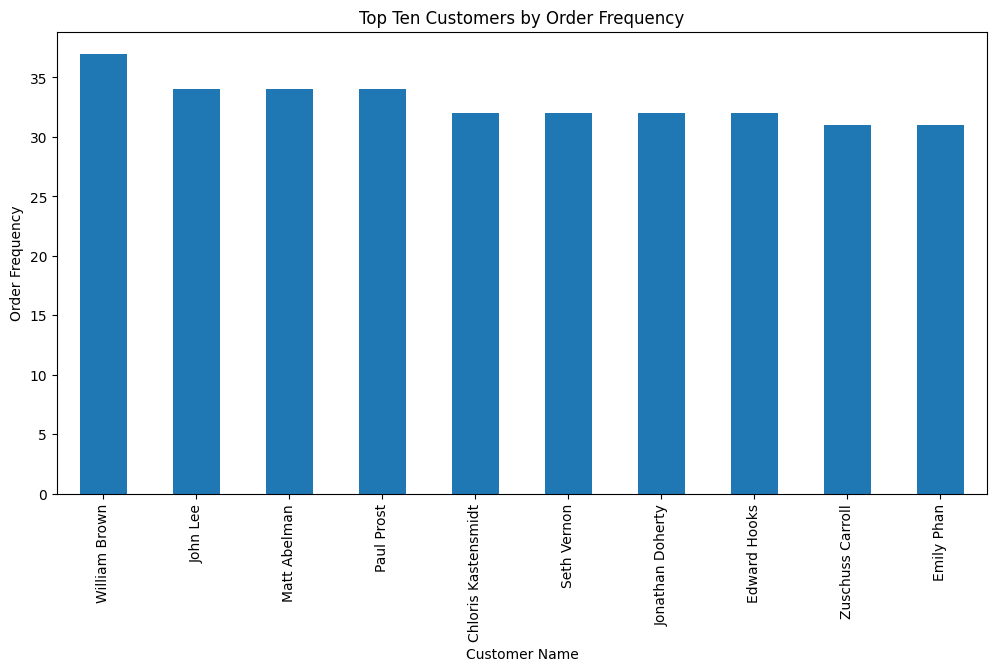

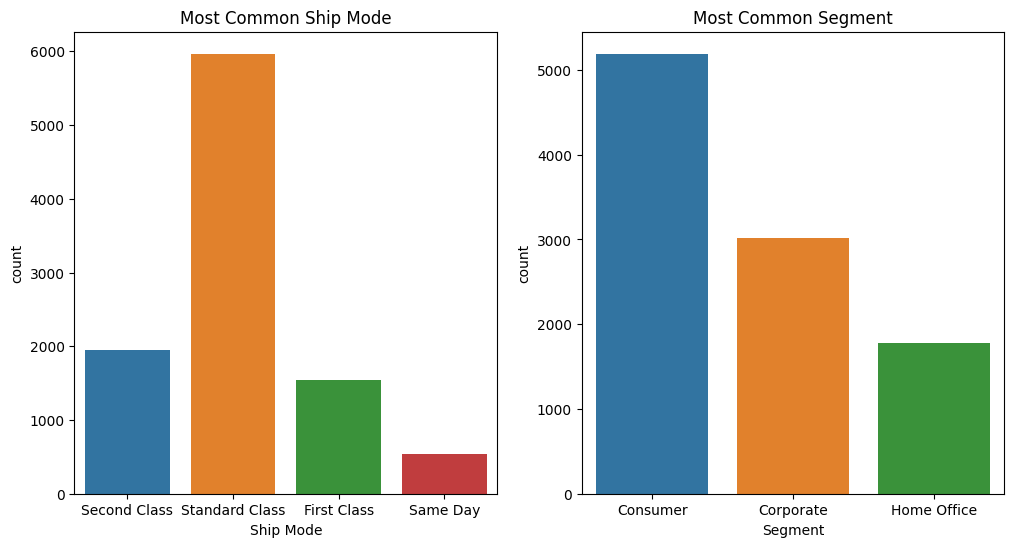

<Figure size 1200x600 with 0 Axes>

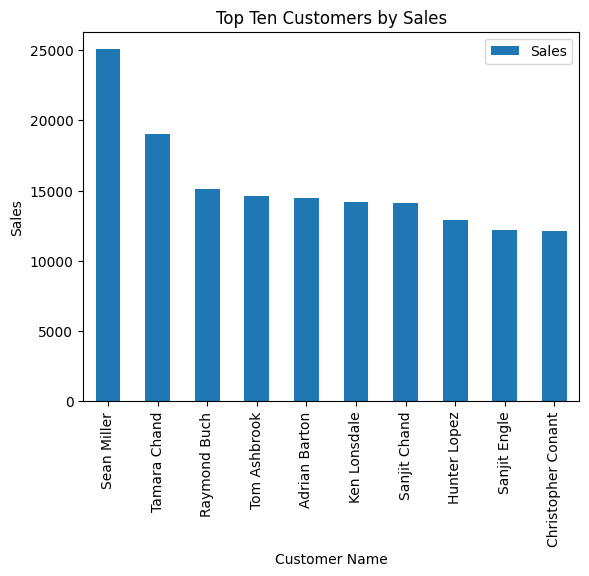

In [11]:


# Assuming your DataFrame is named 'superstore_data'
# Replace 'your_column_names' with the actual column names in your dataset

# Convert 'Customer Name' to string if it's not already
superstore_data['Customer Name'] = superstore_data['Customer Name'].astype(str)

# Top Ten Customers who ordered frequently from the store
top_ten_customers_frequency = superstore_data['Customer Name'].value_counts().head(10)

# The most common ship_mode and segment used by customers
common_ship_mode = superstore_data['Ship Mode'].mode()[0]
common_segment = superstore_data['Segment'].mode()[0]

# Top 20 Customers by profit and by State
top_20_customers_profit_state = superstore_data.groupby(['Customer Name', 'State']).agg({'Profit': 'sum'}).nlargest(20, 'Profit')

# Top 10 Customers by Sale and by State
top_10_customers_sale_state = superstore_data.groupby(['Customer Name', 'State']).agg({'Sales': 'sum'}).nlargest(10, 'Sales')

# Top Ten Customers by Sales
top_ten_customers_sales = superstore_data.groupby('Customer Name').agg({'Sales': 'sum'}).nlargest(10, 'Sales')

# Visualization

# Top Ten Customers who ordered frequently from the store
plt.figure(figsize=(12, 6))
top_ten_customers_frequency.plot(kind='bar')
plt.title('Top Ten Customers by Order Frequency')
plt.xlabel('Customer Name')
plt.ylabel('Order Frequency')
plt.show()

# Top Ten Customers by Sales
plt.figure(figsize=(12, 6))
top_ten_customers_sales.plot(kind='bar')
plt.title('Top Ten Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.show()


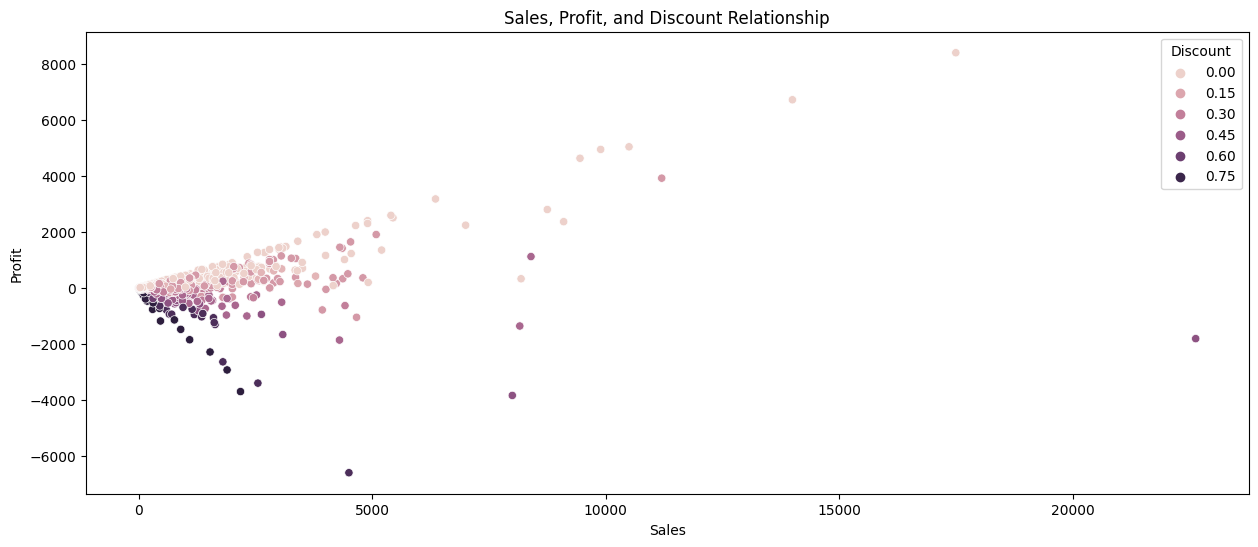

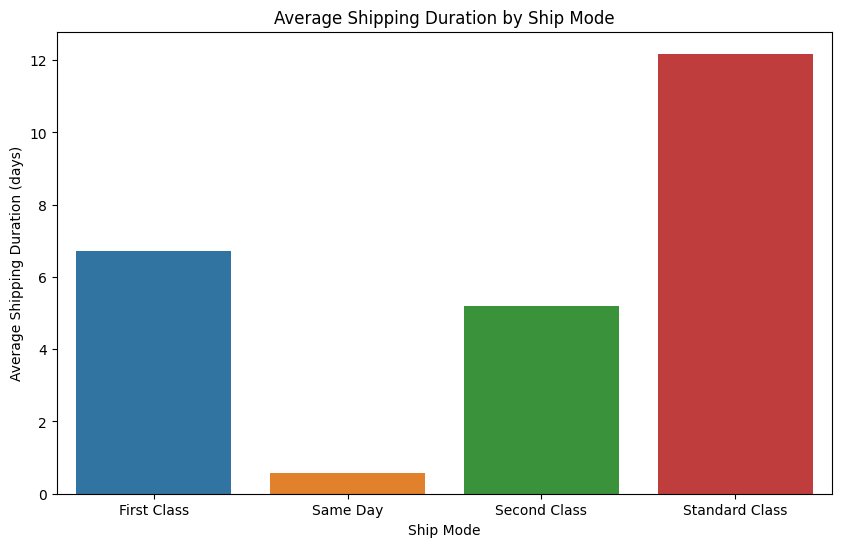

Highest Shipment Duration by Ship Mode for Top 20 Products:
Ship Mode
First Class        92
Same Day            0
Second Class      123
Standard Class    213
Name: Shipment Duration, dtype: int64

Average Shipping Duration by Ship Mode:
Ship Mode
First Class        6.718466
Same Day           0.559853
Second Class       5.188175
Standard Class    12.180295
Name: Shipment Duration, dtype: float64


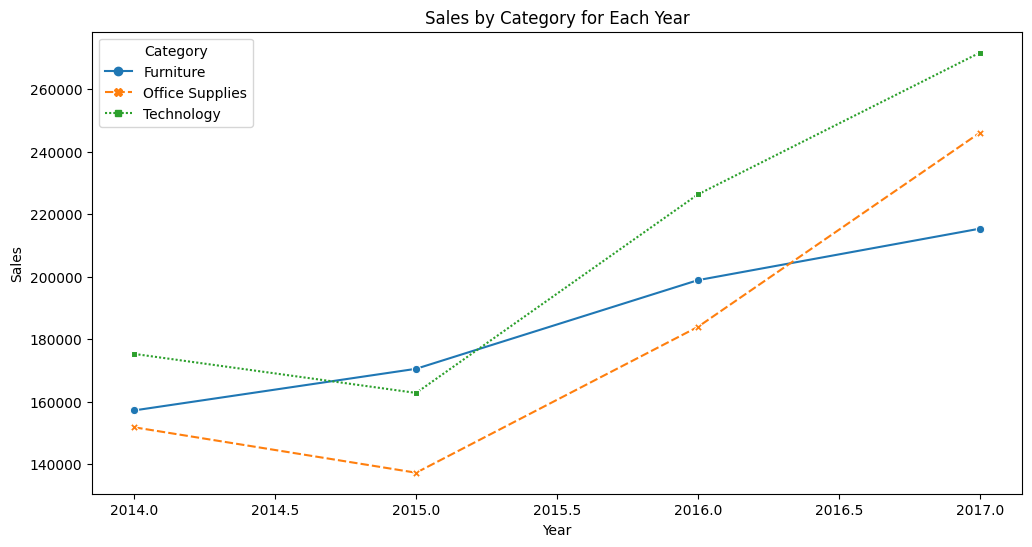

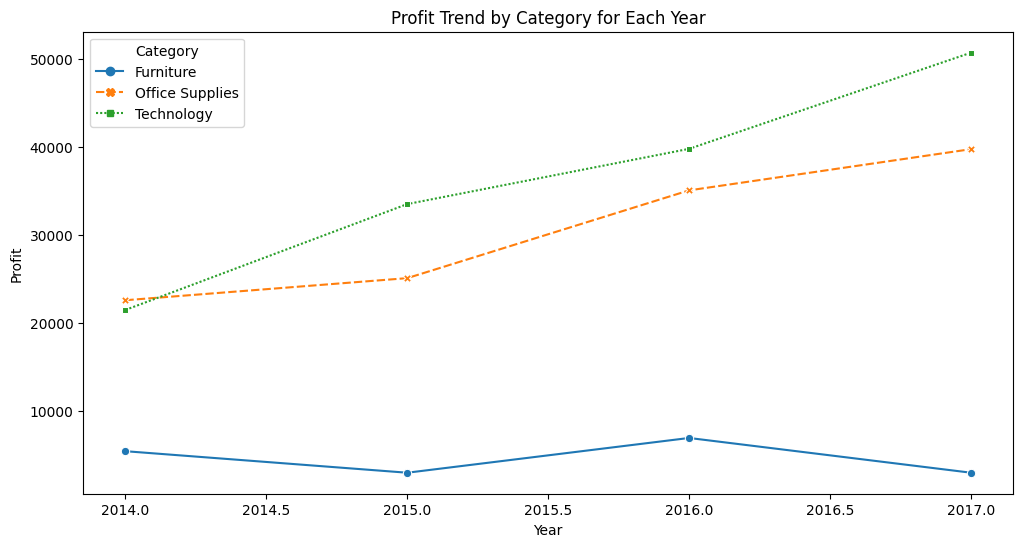

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'superstore_data'
# Replace 'your_column_names' with the actual column names in your dataset

# Convert 'Order Date' and 'Ship Date' to datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'])

# Compute Shipment Duration
superstore_data['Shipment Duration'] = (superstore_data['Ship Date'] - superstore_data['Order Date']).dt.days

# Highest shipment duration and ship mode by top 20 product
top_20_products = superstore_data.groupby('Product Name')['Sales'].sum().nlargest(20).index
top_20_shipment_duration = superstore_data[superstore_data['Product Name'].isin(top_20_products)]
highest_shipment_duration_by_ship_mode = top_20_shipment_duration.groupby('Ship Mode')['Shipment Duration'].max()

# Average shipping duration by ship mode
average_shipping_duration_by_ship_mode = superstore_data.groupby('Ship Mode')['Shipment Duration'].mean()

# Sales by Category for each year
superstore_data['Year'] = superstore_data['Order Date'].dt.year
sales_by_category_yearly = superstore_data.groupby(['Year', 'Category'])['Sales'].sum().unstack()

# Profit Trend by Category For Each Year
profit_by_category_yearly = superstore_data.groupby(['Year', 'Category'])['Profit'].sum().unstack()

# Sales, Profit, and Discount Relationship
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Discount', data=superstore_data)
plt.title('Sales, Profit, and Discount Relationship')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Average shipping duration by ship mode visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=average_shipping_duration_by_ship_mode.index, y=average_shipping_duration_by_ship_mode.values)
plt.title('Average Shipping Duration by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Duration (days)')
plt.show()

# Highest shipment duration and ship mode by top 20 product
print("Highest Shipment Duration by Ship Mode for Top 20 Products:")
print(highest_shipment_duration_by_ship_mode)

# Average shipping duration by ship mode
print("\nAverage Shipping Duration by Ship Mode:")
print(average_shipping_duration_by_ship_mode)

# Sales by Category for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_category_yearly, markers=True)
plt.title('Sales by Category for Each Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Profit Trend by Category For Each Year
plt.figure(figsize=(12, 6))
sns.lineplot(data=profit_by_category_yearly, markers=True)
plt.title('Profit Trend by Category for Each Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()


In [ ]:

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'], errors='coerce')  # 'coerce' will handle any invalid date values

# Drop rows with missing or invalid dates
superstore_data = superstore_data.dropna(subset=['Order Date'])

# Extract year, month, and day
superstore_data['Year'] = superstore_data['Order Date'].dt.year
superstore_data['Month'] = superstore_data['Order Date'].dt.month
superstore_data['Day'] = superstore_data['Order Date'].dt.day

# Now you have new columns 'Year', 'Month', and 'Day'
print(superstore_data[['Order Date', 'Year', 'Month', 'Day']])


     Order Date  Year  Month  Day
0    2016-08-11  2016      8   11
1    2016-08-11  2016      8   11
2    2016-12-06  2016     12    6
3    2015-11-10  2015     11   10
4    2015-11-10  2015     11   10
...         ...   ...    ...  ...
9989 2014-01-21  2014      1   21
9990 2017-02-26  2017      2   26
9991 2017-02-26  2017      2   26
9992 2017-02-26  2017      2   26
9993 2017-04-05  2017      4    5

[9994 rows x 4 columns]


<ipython-input-4-a7eb13e8e332>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'], errors='coerce')  # 'coerce' will handle any invalid date values


In [ ]:
superstore_data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,8,11
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,8,11
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,12,6
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11,10


In [ ]:
# Step 2: Data Exploration
print("Basic Statistics:")
print(superstore_data.describe())

Basic Statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit         Year        Month          Day  
count  9994.000000  9994.000000  9994.000000  9994.000000  
mean     28.656896  2015.722233     7.174605    16.103562  
std     234.260108     1.123555     3.428273     8.064335  
min   -6599.978000  2014.000000     1.000000     1.000000

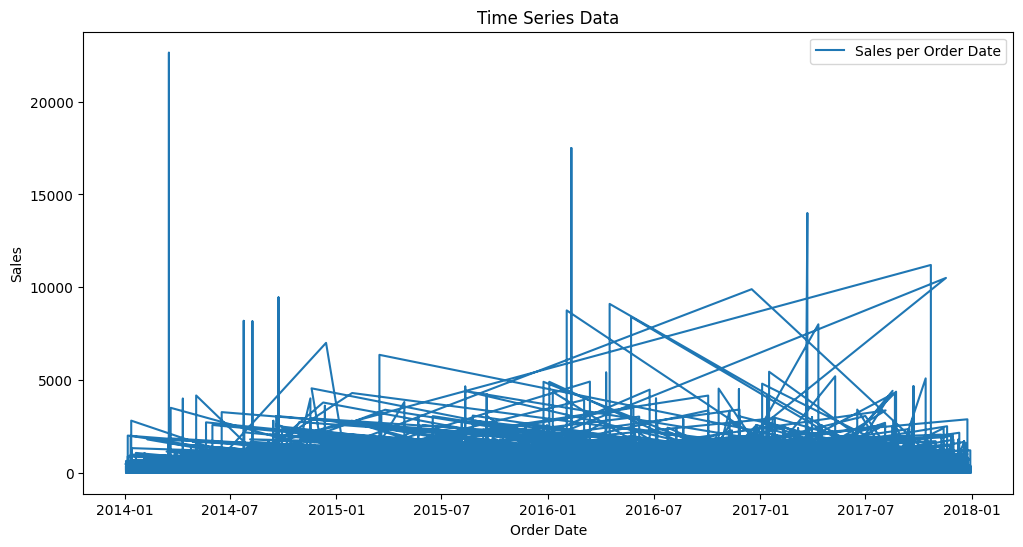

In [ ]:
# Plot time series data
plt.figure(figsize=(12, 6))
plt.plot(superstore_data['Order Date'], superstore_data['Sales'], label='Sales per Order Date')
plt.title('Time Series Data')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


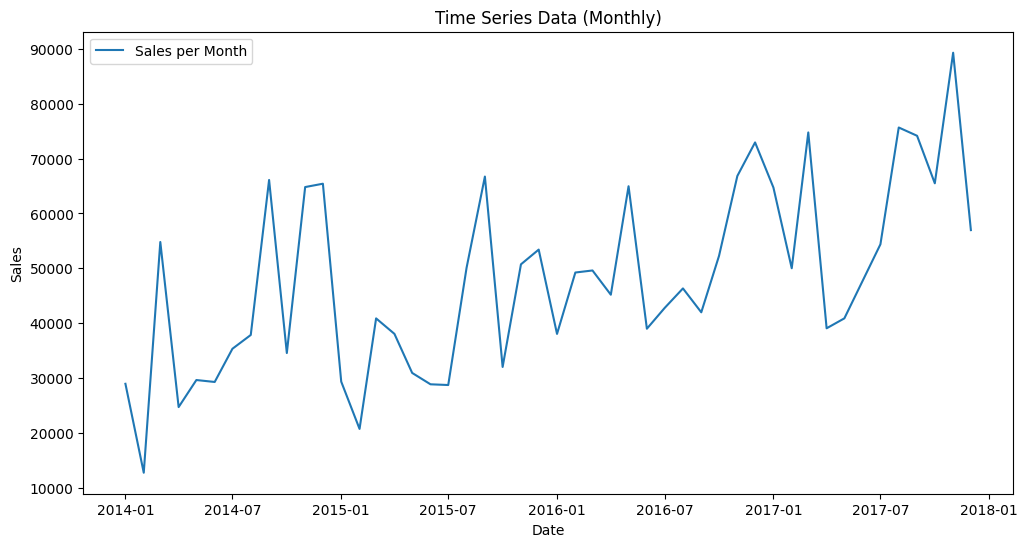

In [ ]:

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extracting month and year from the 'Order Date' column
superstore_data['month'] = superstore_data['Order Date'].dt.month
superstore_data['year'] = superstore_data['Order Date'].dt.year

# Grouping by month and summing the 'Sales'
monthly_data = superstore_data.groupby(['year', 'month'])['Sales'].sum().reset_index()

# Plot time series data month-wise
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(monthly_data[['year', 'month']].assign(day=1)), monthly_data['Sales'], label='Sales per Month')
plt.title('Time Series Data (Monthly)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# Display the number of missing values in each column
missing_values = superstore_data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Display the percentage of missing values in each column
percentage_missing = (superstore_data.isnull().sum() / len(superstore_data)) * 100
print("\nPercentage of Missing Values:")
print(percentage_missing)

Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
Day              0
month            0
year             0
dtype: int64

Percentage of Missing Values:
Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
Quantity         0.0
Discount         0.0
Profit           0.0
Year 

In [ ]:
superstore_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,month,year
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,8,11,8,2016
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,8,11,8,2016
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,12,6,12,2016
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11,10,11,2015
4,5,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11,10,11,2015


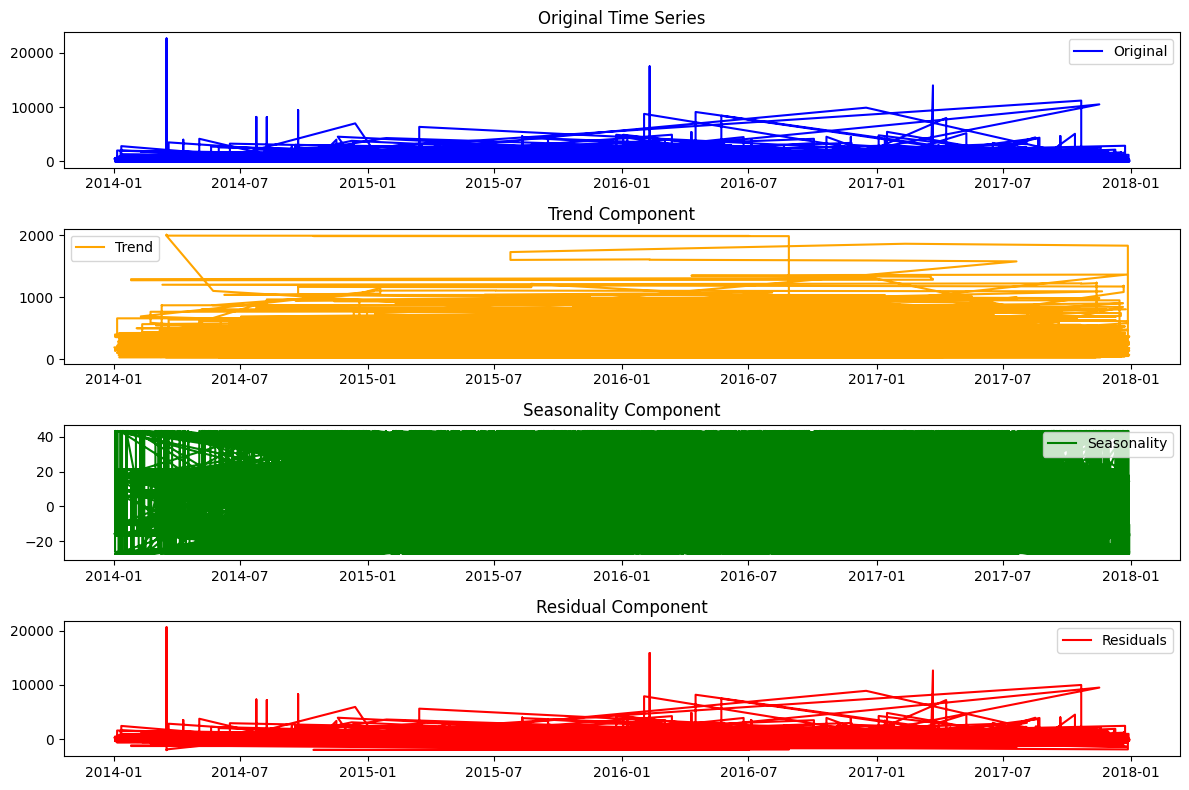

In [ ]:


# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Set 'Order Date' as the index
superstore_data.set_index('Order Date', inplace=True)

# Time Series Decomposition
decomposition = seasonal_decompose(superstore_data['Sales'], period=12)  # Adjust period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize Decomposition with different colors
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(superstore_data['Sales'], label='Original', color='blue')
plt.legend()
plt.title('Original Time Series')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()
plt.title('Trend Component')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend()
plt.title('Seasonality Component')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()


<ipython-input-12-64b309a483a2>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


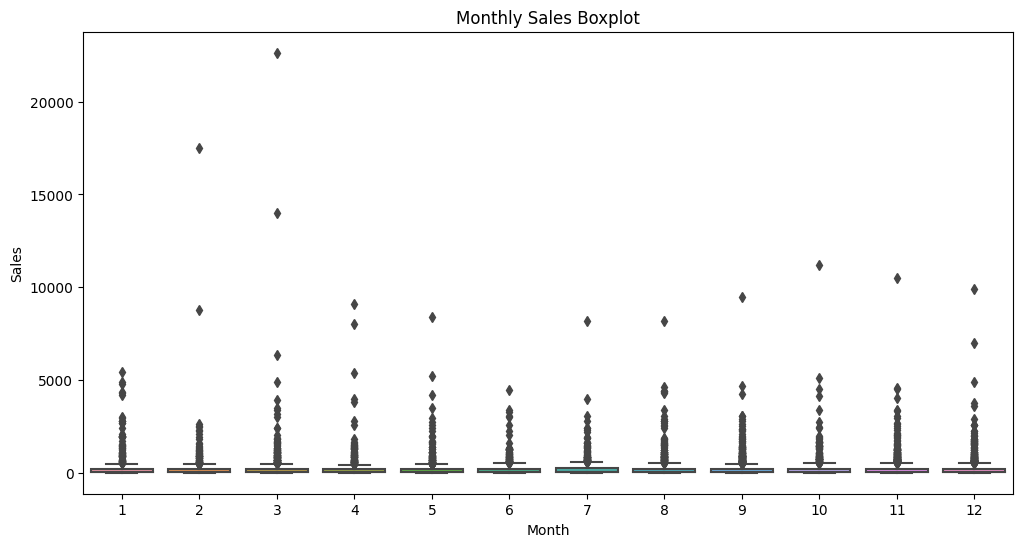

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Superstore dataset
superstore_data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extracting month and year from the 'Order Date' column
superstore_data['month'] = superstore_data['Order Date'].dt.month
superstore_data['year'] = superstore_data['Order Date'].dt.year

# Creating a boxplot of Sales for each month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Sales', data=superstore_data)
plt.title('Monthly Sales Boxplot')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [ ]:
# Step 5: Model Selection
# a. Simple Models
# Moving Averages
superstore_data['rolling_mean'] = superstore_data['Sales'].rolling(window=3).mean()  # Adjust window size as needed

# Explanation:
# sales_data['item_cnt_day']: This is the time series data you are working with, specifically the daily count of items (item_cnt_day).

# rolling(window=3): This part creates a rolling window of size 3. The rolling window is a moving subset of your data that "rolls" through the entire series. In this case, it considers the current value and the two previous values.

# mean(): For each position of the rolling window, it calculates the mean (average) of the values within that window.

# sales_data['rolling_mean']: This creates a new column in your DataFrame (sales_data) called 'rolling_mean' to store the calculated moving averages.

# Purpose:
# The moving average is a simple method to smooth out short-term fluctuations in time series data. It is particularly useful for highlighting trends over time. By calculating the average over a window of adjacent data points, the noise or randomness in the data can be reduced, making it easier to identify underlying patterns.

# Adjustments:
# Window Size (window=3): You can adjust the window size based on your requirements. A larger window will result in a smoother curve but may smooth out important short-term fluctuations. Experiment with different window sizes to find a balance that suits your analysis.

# Other Aggregations: Instead of the mean, you can use other aggregation functions like sum, median, or other statistical measures, depending on the nature of your data and the insights you are seeking.


<ipython-input-14-a9a45789e063>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


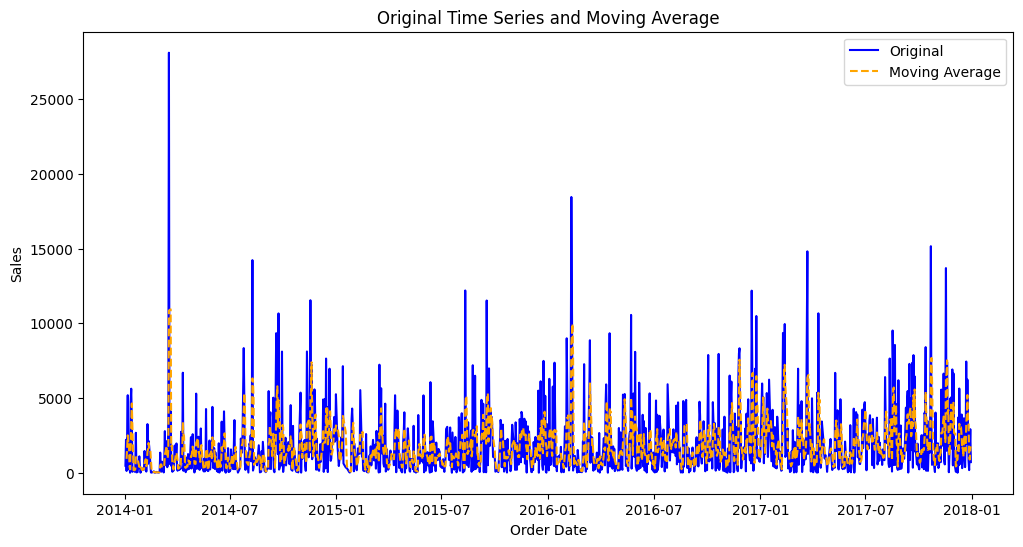

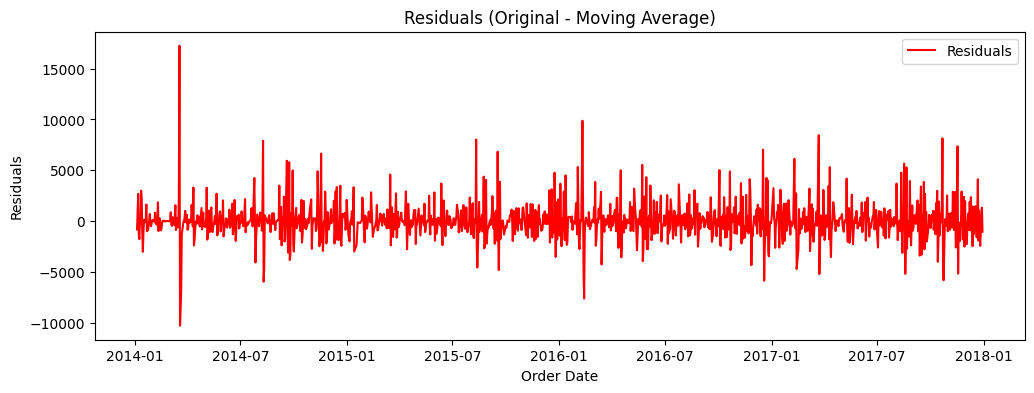

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Superstore dataset
superstore_data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract relevant columns for time series analysis
time_series_data = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Calculate the moving average
time_series_data['rolling_mean'] = time_series_data['Sales'].rolling(window=3).mean()  # Adjust window size as needed

# Plot Original Time Series and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Order Date'], time_series_data['Sales'], label='Original', color='blue')
plt.plot(time_series_data['Order Date'], time_series_data['rolling_mean'], label='Moving Average', linestyle='--', color='orange')
plt.title('Original Time Series and Moving Average')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot Residuals (Difference between Original and Moving Average)
residuals = time_series_data['Sales'] - time_series_data['rolling_mean']

plt.figure(figsize=(12, 4))
plt.plot(time_series_data['Order Date'], residuals, label='Residuals', color='red')
plt.title('Residuals (Original - Moving Average)')
plt.xlabel('Order Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


<ipython-input-15-a9bcf74f80a8>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])


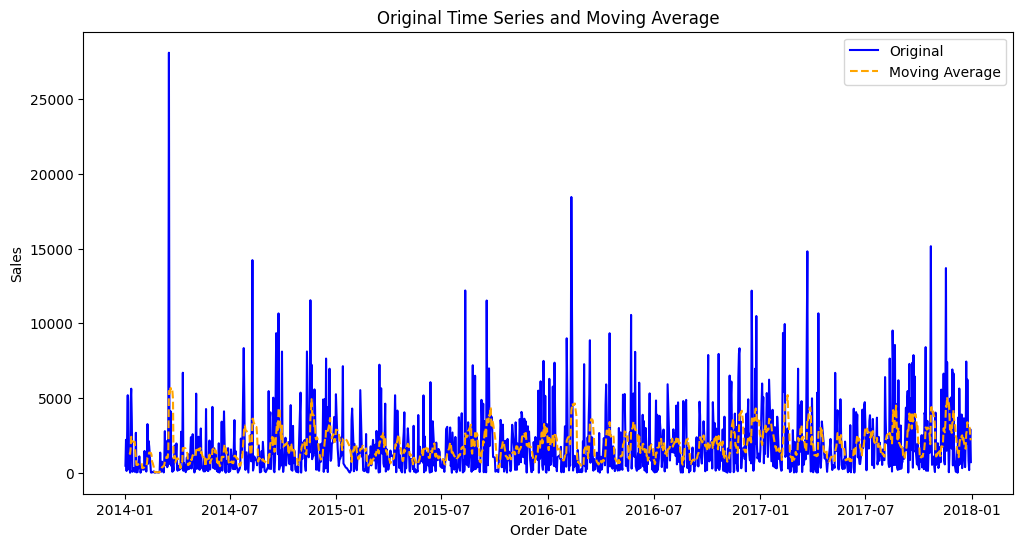

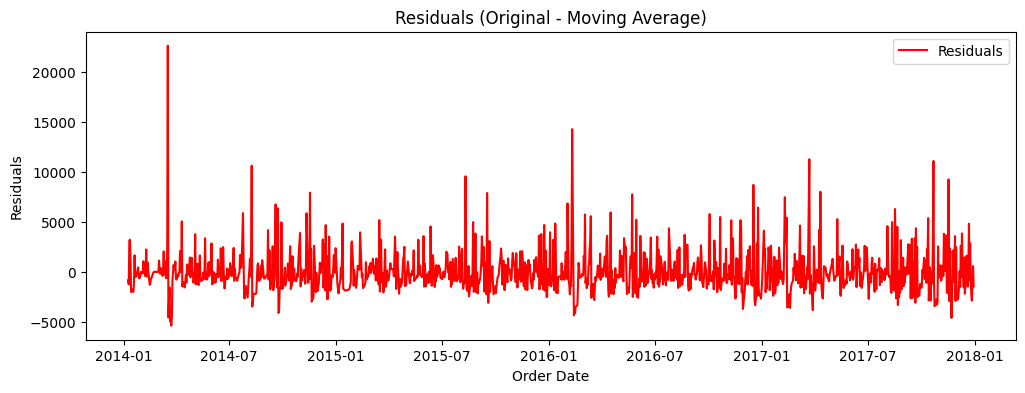

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Superstore dataset
superstore_data = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Assuming 'Order Date' is in string format, convert it to datetime
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'])

# Extract relevant columns for time series analysis
time_series_data = superstore_data.groupby('Order Date')['Sales'].sum().reset_index()

# Calculate the moving average with a window size of 7
time_series_data['rolling_mean'] = time_series_data['Sales'].rolling(window=7).mean()

# Plot Original Time Series and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Order Date'], time_series_data['Sales'], label='Original', color='blue')
plt.plot(time_series_data['Order Date'], time_series_data['rolling_mean'], label='Moving Average', linestyle='--', color='orange')
plt.title('Original Time Series and Moving Average')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot Residuals (Difference between Original and Moving Average)
residuals = time_series_data['Sales'] - time_series_data['rolling_mean']

plt.figure(figsize=(12, 4))
plt.plot(time_series_data['Order Date'], residuals, label='Residuals', color='red')
plt.title('Residuals (Original - Moving Average)')
plt.xlabel('Order Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [ ]:


# Calculate rolling means
time_series_data['rolling_mean_3'] = time_series_data['Sales'].rolling(window=3).mean()
time_series_data['rolling_mean_7'] = time_series_data['Sales'].rolling(window=7).mean()

# Calculate residuals for 3-window and 7-window moving averages
residuals_3 = time_series_data['Sales'] - time_series_data['rolling_mean_3']
residuals_7 = time_series_data['Sales'] - time_series_data['rolling_mean_7']

# Print the sum of residuals for both cases
print(f"Sum of Residuals (3-window): {residuals_3.sum()}")
print(f"Sum of Residuals (7-window): {residuals_7.sum()}")




Sum of Residuals (3-window): -177.36266666347774
Sum of Residuals (7-window): -1.8853999998332256


In [ ]:
# b. Advanced Models
# ARIMA
model_arima = SARIMAX(superstore_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_arima_fit = model_arima.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# c. Machine Learning Models
# Linear Regression
X = superstore_data[['Quantity', 'Discount', 'Profit']]  # Replace with relevant features
y = superstore_data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Step 6: Model Training
# Split your data into training and testing sets
train_size = int(len(superstore_data) * 0.8)
train, test = superstore_data[0:train_size], superstore_data[train_size:]

In [ ]:
# Linear Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, shuffle=False)
model_lr.fit(X_train_lr, y_train_lr)

# Random Forest
model_rf.fit(X_train_lr, y_train_lr)

# ARIMA
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Step 7: Model Evaluation
# Evaluate the performance of each model using metrics such as MAE, MSE, or RMSE
# Compare the performance of different models

# Linear Regression
y_pred_lr = model_lr.predict(X_test_lr)
rmse_lr = sqrt(mean_squared_error(y_test_lr, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')

# Random Forest
y_pred_rf = model_rf.predict(X_test_lr)
rmse_rf = sqrt(mean_squared_error(y_test_lr, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf}')

# ARIMA
y_pred_arima = model_arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
rmse_arima = sqrt(mean_squared_error(test['Sales'], y_pred_arima))
print(f'ARIMA RMSE: {rmse_arima}')


Linear Regression RMSE: 458.6457171138035
Random Forest RMSE: 302.7252010547864
ARIMA RMSE: 633.0502780714013


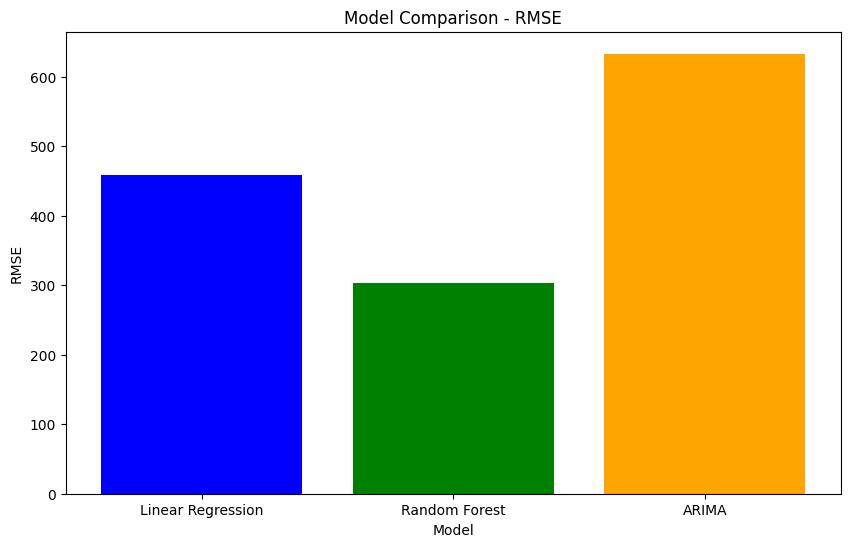

In [ ]:
# Step 8: Compare the performance of different models
model_names = ['Linear Regression', 'Random Forest', 'ARIMA']
rmse_values = [rmse_lr, rmse_rf, rmse_arima]

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'orange'])
plt.title('Model Comparison - RMSE')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse_lr = sqrt(mse_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

print(f'Linear Regression Metrics:')
print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R-squared: {r2_lr}')

# Random Forest
mae_rf = mean_absolute_error(y_test_lr, y_pred_rf)
mse_rf = mean_squared_error(y_test_lr, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test_lr, y_pred_rf)

print(f'\nRandom Forest Metrics:')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R-squared: {r2_rf}')

# ARIMA
mae_arima = mean_absolute_error(test['Sales'], y_pred_arima)
mse_arima = mean_squared_error(test['Sales'], y_pred_arima)
rmse_arima = sqrt(mse_arima)
r2_arima = r2_score(test['Sales'], y_pred_arima)

print(f'\nARIMA Metrics:')
print(f'MAE: {mae_arima}')
print(f'MSE: {mse_arima}')
print(f'RMSE: {rmse_arima}')
print(f'R-squared: {r2_arima}')


Linear Regression Metrics:
MAE: 228.5976137048577
MSE: 210355.8938268351
RMSE: 458.6457171138035
R-squared: 0.4735671073975467

Random Forest Metrics:
MAE: 94.02607117725489
MSE: 91642.54735366085
RMSE: 302.7252010547864
R-squared: 0.7706570022299487

ARIMA Metrics:
MAE: 272.87229028589474
MSE: 400752.65456627856
RMSE: 633.0502780714013
R-squared: -0.0029164161908756814


In [ ]:
superstore_data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 824.8499599151106


Linear Regression RMSE: 824.8499599151106
Random Forest RMSE: 518.1897625347999
Support Vector Regression RMSE: 721.8379384432759
K-Nearest Neighbors RMSE: 561.5689314538214
Decision Tree RMSE: 533.616457978252


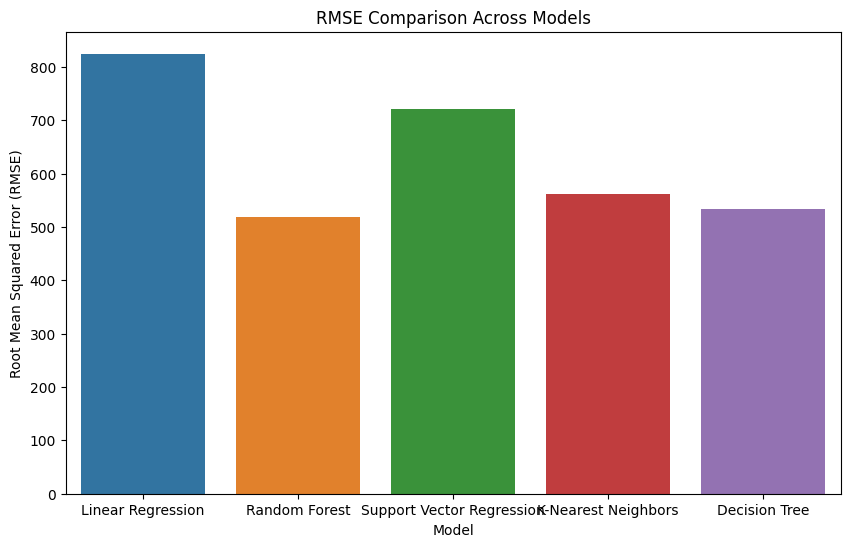

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Training and evaluation
rmse_values = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values[model_name] = rmse
    print(f'{model_name} RMSE: {rmse}')

# Visualize RMSE values
plt.figure(figsize=(10, 6))
sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()))
plt.title('RMSE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()


<ipython-input-31-332138096d94>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'], errors='coerce')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

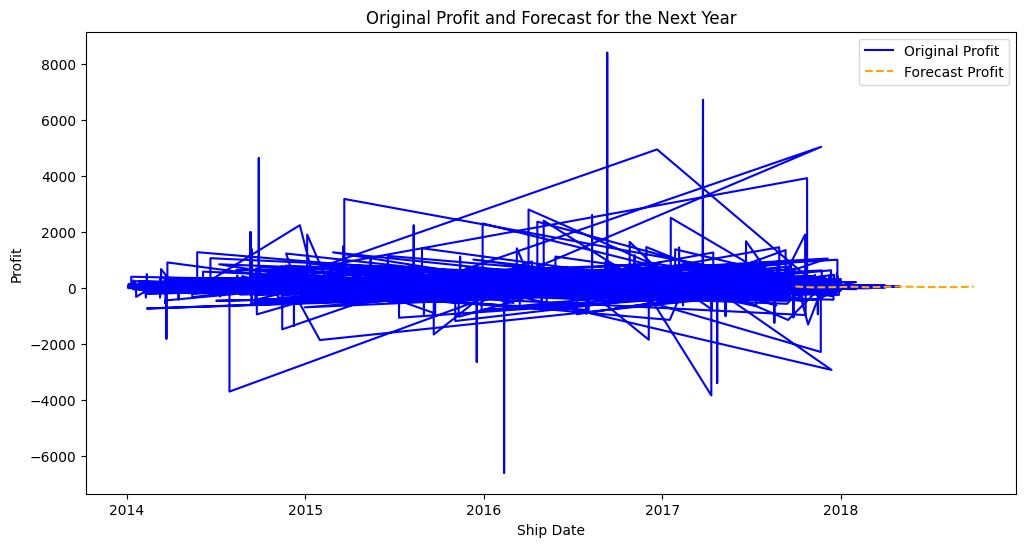

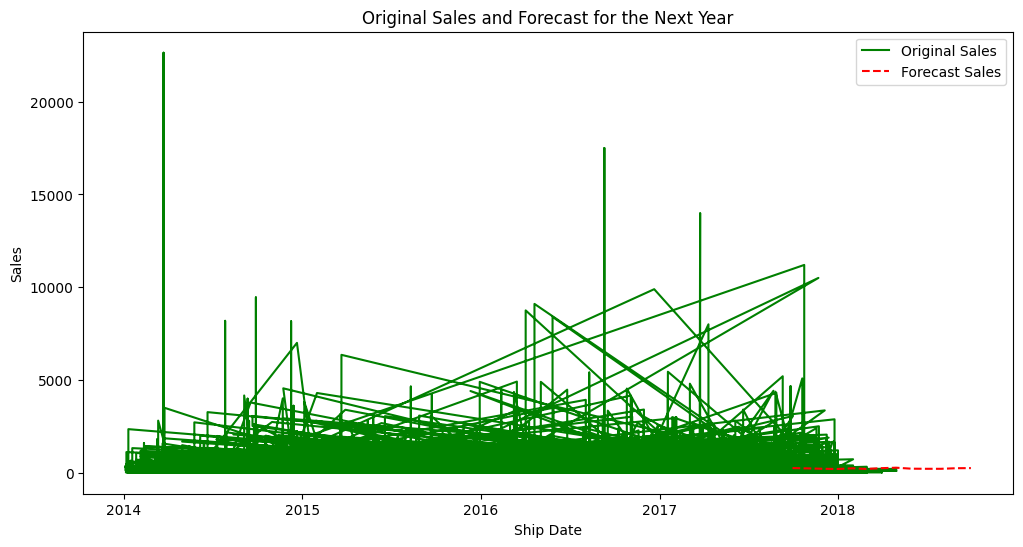

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'Ship Date' is in string format, convert it to datetime
superstore_data['Ship Date'] = pd.to_datetime(superstore_data['Ship Date'], errors='coerce')
superstore_data = superstore_data.dropna(subset=['Ship Date'])
superstore_data.set_index('Ship Date', inplace=True)

# Create a new DataFrame with only 'Profit' and 'Sales' columns
time_series_data = superstore_data[['Profit', 'Sales']]

# Fit SARIMAX models for Profit and Sales
model_profit = SARIMAX(time_series_data['Profit'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sales = SARIMAX(time_series_data['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

model_profit_fit = model_profit.fit()
model_sales_fit = model_sales.fit()

# Forecast for the next year
forecast_horizon = 12  # Adjust as needed
future_dates = pd.date_range(start=time_series_data.index[-1], periods=forecast_horizon + 1, freq='M')
forecast_profit = model_profit_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon, typ='levels')
forecast_sales = model_sales_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon, typ='levels')

# Combine the forecast values with the corresponding future dates
forecast_data = pd.DataFrame({'Date': future_dates, 'Forecast Profit': forecast_profit, 'Forecast Sales': forecast_sales})
forecast_data.set_index('Date', inplace=True)

# Plot the original time series and the forecast for Profit
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Profit'], label='Original Profit', color='blue')
plt.plot(forecast_data['Forecast Profit'], label='Forecast Profit', linestyle='--', color='orange')
plt.title('Original Profit and Forecast for the Next Year')
plt.xlabel('Ship Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Plot the original time series and the forecast for Sales
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Sales'], label='Original Sales', color='green')
plt.plot(forecast_data['Forecast Sales'], label='Forecast Sales', linestyle='--', color='red')
plt.title('Original Sales and Forecast for the Next Year')
plt.xlabel('Ship Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

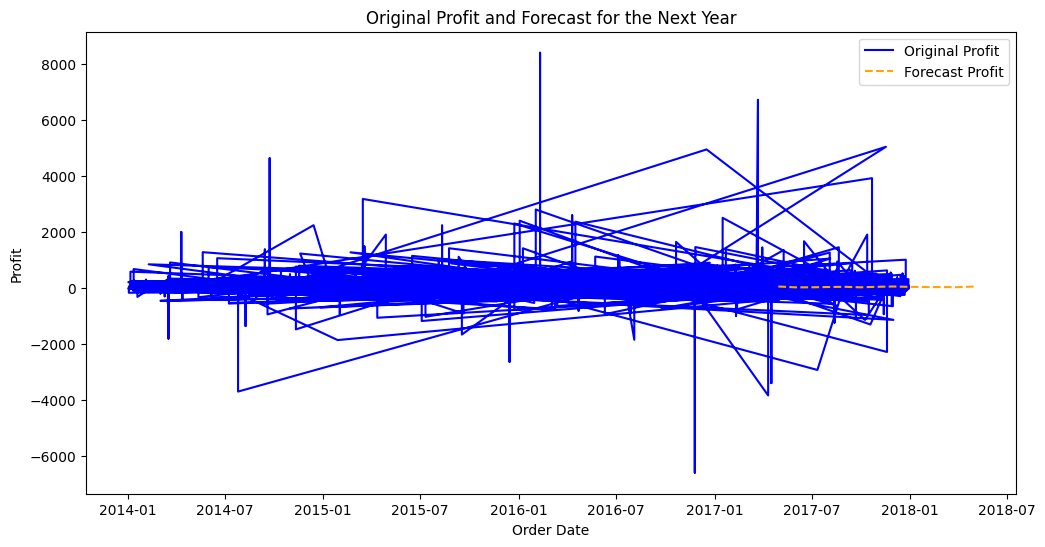

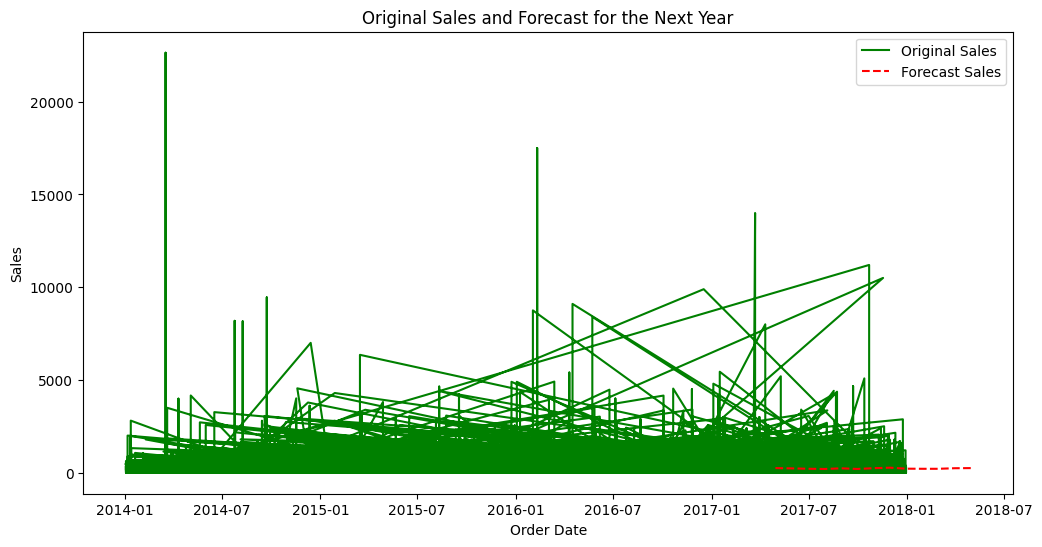

            Forecast Profit  Forecast Sales
Date                                       
2017-04-30        50.359139      250.239127
2017-05-31        21.817152      234.492434
2017-06-30        21.912864      213.261850
2017-07-31        31.925664      202.215692
2017-08-31        39.610023      237.926724
2017-09-30        22.390478      203.525849
2017-10-31        39.460014      245.948403
2017-11-30        50.682041      271.481726
2017-12-31        38.836816      218.346103
2018-01-31        31.324660      212.236551
2018-02-28        30.283501      211.830160
2018-03-31        27.287922      242.788391
2018-04-30        49.176542      249.720174


In [ ]:

# Forecast for the next year
forecast_horizon = 12  # Adjust as needed
future_dates = pd.date_range(start=time_series_data.index[-1], periods=forecast_horizon + 1, freq='M')
forecast_profit = model_profit_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon, typ='levels')
forecast_sales = model_sales_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon, typ='levels')

# Combine the forecast values with the corresponding future dates
forecast_data = pd.DataFrame({'Date': future_dates, 'Forecast Profit': forecast_profit, 'Forecast Sales': forecast_sales})
forecast_data.set_index('Date', inplace=True)

# Plot the original time series and the forecast for Profit
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Profit'], label='Original Profit', color='blue')
plt.plot(forecast_data['Forecast Profit'], label='Forecast Profit', linestyle='--', color='orange')
plt.title('Original Profit and Forecast for the Next Year')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Plot the original time series and the forecast for Sales
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Sales'], label='Original Sales', color='green')
plt.plot(forecast_data['Forecast Sales'], label='Forecast Sales', linestyle='--', color='red')
plt.title('Original Sales and Forecast for the Next Year')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print numerical values for monthly forecasts
print(forecast_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

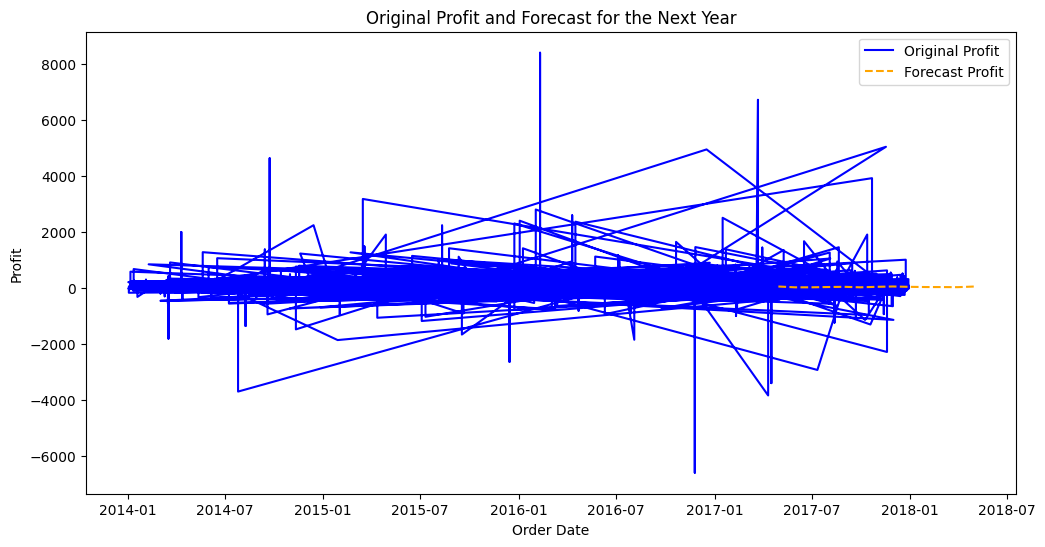

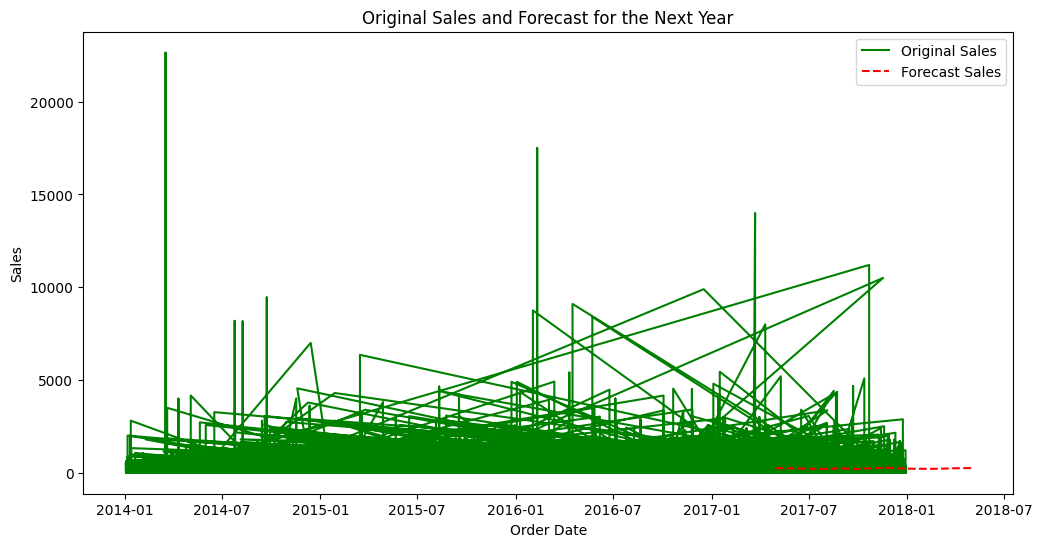

            Forecast Profit  Forecast Sales
Date                                       
2018-04-30        49.176542      249.720174
2018-03-31        27.287922      242.788391
2018-02-28        30.283501      211.830160
2018-01-31        31.324660      212.236551
2017-12-31        38.836816      218.346103
2017-11-30        50.682041      271.481726
2017-10-31        39.460014      245.948403
2017-09-30        22.390478      203.525849
2017-08-31        39.610023      237.926724
2017-07-31        31.925664      202.215692
2017-06-30        21.912864      213.261850
2017-05-31        21.817152      234.492434
2017-04-30        50.359139      250.239127


In [ ]:


# Forecast for the next year
forecast_horizon = 12  # Adjust as needed
future_dates = pd.date_range(start=time_series_data.index[-1], periods=forecast_horizon + 1, freq='M')
forecast_profit = model_profit_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon, typ='levels')
forecast_sales = model_sales_fit.predict(start=len(time_series_data), end=len(time_series_data) + forecast_horizon, typ='levels')

# Combine the forecast values with the corresponding future dates
forecast_data = pd.DataFrame({'Date': future_dates, 'Forecast Profit': forecast_profit, 'Forecast Sales': forecast_sales})
forecast_data.set_index('Date', inplace=True)

# Arrange data in descending order of months
forecast_data = forecast_data.sort_index(ascending=False)

# Plot the original time series and the forecast for Profit
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Profit'], label='Original Profit', color='blue')
plt.plot(forecast_data['Forecast Profit'], label='Forecast Profit', linestyle='--', color='orange')
plt.title('Original Profit and Forecast for the Next Year')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Plot the original time series and the forecast for Sales
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Sales'], label='Original Sales', color='green')
plt.plot(forecast_data['Forecast Sales'], label='Forecast Sales', linestyle='--', color='red')
plt.title('Original Sales and Forecast for the Next Year')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print numerical values for monthly forecasts
print(forecast_data)
